# Importing libraries

In [1]:
# NumPy
import numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# BeautifulSoup
from bs4 import BeautifulSoup

# Request
import requests

# RegEX
import re

### an empty Data Frame to store the data in different web pages

In [2]:
FIFA_data = pd.DataFrame()  

###         step 2. checking the status code

In [5]:


n = int(input("Enter the no.of pages to scrap for the web : "))
for i in range(n):
    url = f'https://www.futwiz.com/en/fifa22/players?page={i}'
    req = requests.get(url)

###     step 3.scraping the data (OR)  parsing HTML and XML documents
    soup = BeautifulSoup(req.content)
    
    ### there are the table names which i want to scrap from web
    player_image = []
    player_name = []
    value = []
    code = []
    over_all = []
    PAC = []
    Rating = []
    Right_Striker = []
    DEF = []

##       create a empty one to append the data after cleaning
##  list refers to the no.of tables that you have created  
    lists = [[] for _ in range(8)] 

###                     4.data exploration,cleaniing,muniplunation
    for i in soup.findAll('tr'):
        player_image = re.sub('\n|^<.*>|<.*>$|<a.*src="|"/></a>','',str(i.find('td',{'class':'face'})))
        player_name = re.sub('\n|^<.*>|<.*>$|<img.*png">|<a href.*"><b>|</b></a>','',str(i.find('p',class_='name')))
        code = re.sub('\n|^<.*>|<.*>$|<img.*">| <a.*</a>|</a>|<a.*\d+/0">','',str(i.find('p',class_='team')))
        over_all = re.sub('\n|^<.*>|<.*>$|<a.*>|<div.*t">|</div>.*>|</a>','',str(i.find('td',class_='ovr')))
        PAC = re.sub('\n|^<.*>|<.*>$|<td.*>|<span |</span>|class="statLabel">.*>|class="stat">','',str(i.find('td',{'class':'statCol'})))
        Rating = re.sub('\n|<.*>','',str(i.find('span',class_='starRating')))
        Right_Striker = re.sub('\n|^<.*>|<span.*">|</span> </span>','',str(i.find('span',{'class':'wrs'})))
        value = re.sub('^<.*>|\n|<.*>$|M|K','',str(i.find('td',{'width':30})))
        lists[0].append(player_image)
        lists[1].append(player_name)
        lists[2].append(value)
        lists[3].append(code)
        lists[4].append(over_all)
        lists[5].append(PAC)
        lists[6].append(Rating)
        lists[7].append(Right_Striker)        
        
        # value = pd.to_numeric(value)

###              step 5.convert it into the dataframe
DATA = pd.DataFrame({'image':lists[0],'name':lists[1],'value':lists[2],'code':lists[3],'over_all':lists[4],
                            'PAC':lists[5],'Rating':lists[6],'Right_Striker':lists[7]})
DATA.drop(0 , inplace=True)
       
FIFA_data = pd.concat([FIFA_data,DATA],ignore_index=True)


<>:28: SyntaxWarning: invalid escape sequence '\d'
<>:28: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ABC\AppData\Local\Temp\ipykernel_3512\15592587.py:28: SyntaxWarning: invalid escape sequence '\d'
  code = re.sub('\n|^<.*>|<.*>$|<img.*">| <a.*</a>|</a>|<a.*\d+/0">','',str(i.find('p',class_='team')))


In [8]:
FIFA_data.head()

,image,name,value,code,over_all,PAC,Rating,Right_Striker
0,https://cdn.futwiz.com/assets/img/fifa22/faces...,Ousmane Dembele,,ESP 1,99,99,5,M
1,https://cdn.futwiz.com/assets/img/fifa22/faces...,Mohamed Salah,,ENG 1,99,99,5,M
2,https://cdn.futwiz.com/assets/img/fifa22/faces...,Raphael Varane,,ENG 1,99,96,2,H
3,https://cdn.futwiz.com/assets/img/fifa22/faces...,Pele,3.3,ICO,99,96,5,M
4,https://cdn.futwiz.com/assets/img/fifa22/faces...,Robert Lewandowski,,ESP 1,99,97,4,L


##                        step 6.exploringthe data
###      1.droping one are more columns


In [10]:
FIFA_data.drop(['image'],inplace=True,axis=1)

###      2. to see first 10 data points 


In [17]:
print(FIFA_data.head(10))

                 name value   code over_all PAC Rating Right_Striker
0     Ousmane Dembele        ESP 1       99  99      5             M
1       Mohamed Salah        ENG 1       99  99      5             M
2      Raphael Varane        ENG 1       99  96      2             H
3                Pele   3.3    ICO       99  96      5             M
4  Robert Lewandowski        ESP 1       99  97      4             L
5        Lionel Messi   1.9  FRA 1       99  95      5             L
6   Cristiano Ronaldo     2  ENG 1       99  99      5             L
7      Julian Alvarez        ENG 1       98  99      5             L
8        Jules Kounde        ESP 1       98  96      3             H
9      Erling Haaland        ENG 1       98  99      4             L


###     3. to see last 10 data points


In [18]:
print(FIFA_data.tail(9))

                  name value   code over_all PAC Rating Right_Striker
16        David Ginola     1  ENG 1       98  98      5             M
17           Neymar Jr        FRA 1       98  99      5             L
18   Christian Eriksen        ENG 1       98  96      5             M
19                Pele   1.7    ICO       98  95      5             M
20      Diego Maradona    11    ICO       98  93      5             M
21  Robert Lewandowski   210  GER 1       98  93      4             M
22      Alexis Sanchez        FRA 1       98  97      5             L
23        Ivan Perisic        ENG 1       98  99      4             M
24         Gareth Bale        ESP 1       98  99      5             M


###     5.to decribe the table


In [20]:

print(FIFA_data.describe())

        name value   code over_all PAC Rating Right_Striker
count     25    25     25       25  25     25            25
unique    23     9      6        2   7      4             3
top     Pele        ENG 1       98  99      5             M
freq       2    17     11       18  10     18            11


###                   step 7. data analytics

###          1.Find the name of the player who is having the highest PAC

In [23]:
print(FIFA_data.duplicated().sum(axis=0))

0


In [24]:
FIFA_data.drop_duplicates(inplace=True)
print(FIFA_data[FIFA_data['PAC']==max(FIFA_data['PAC'])]['name'])

0       Ousmane Dembele
1         Mohamed Salah
6     Cristiano Ronaldo
7        Julian Alvarez
9        Erling Haaland
12           Sadio Mane
15    Wissam Ben Yedder
17            Neymar Jr
23         Ivan Perisic
24          Gareth Bale
Name: name, dtype: object



##      2. Hightest and Lowest 
### 2.1 Find the the hightest PAC player

In [25]:

print(FIFA_data[FIFA_data['PAC']== min(FIFA_data['PAC'])][['name','PAC']])

            name PAC
10  N'Golo Kante  92


### 2.2  Find the the Lowest PAC player


In [27]:
print(FIFA_data[FIFA_data['PAC']== max(FIFA_data['PAC'])][['name','PAC']])

                 name PAC
0     Ousmane Dembele  99
1       Mohamed Salah  99
6   Cristiano Ronaldo  99
7      Julian Alvarez  99
9      Erling Haaland  99
12         Sadio Mane  99
15  Wissam Ben Yedder  99
17          Neymar Jr  99
23       Ivan Perisic  99
24        Gareth Bale  99


###         3.list out the top 10 player accrding to their PAC

In [28]:

print(FIFA_data.sort_values(by='PAC',ascending=False)['name'].head(10))


0       Ousmane Dembele
7        Julian Alvarez
23         Ivan Perisic
17            Neymar Jr
15    Wissam Ben Yedder
1         Mohamed Salah
9        Erling Haaland
12           Sadio Mane
24          Gareth Bale
6     Cristiano Ronaldo
Name: name, dtype: object



###         4.create a new dataframe with the values of cloumes-- name and Rating

In [29]:

fifa_new = FIFA_data[['name','Rating']]
print(fifa_new) 

                  name Rating
0      Ousmane Dembele      5
1        Mohamed Salah      5
2       Raphael Varane      2
3                 Pele      5
4   Robert Lewandowski      4
5         Lionel Messi      5
6    Cristiano Ronaldo      5
7       Julian Alvarez      5
8         Jules Kounde      3
9       Erling Haaland      4
10        N'Golo Kante      5
11        Paulo Dybala      5
12          Sadio Mane      5
13           Nick Pope      5
14   Kalidou Koulibaly      2
15   Wissam Ben Yedder      5
16        David Ginola      5
17           Neymar Jr      5
18   Christian Eriksen      5
19                Pele      5
20      Diego Maradona      5
21  Robert Lewandowski      4
22      Alexis Sanchez      5
23        Ivan Perisic      4
24         Gareth Bale      5


###        5.plot a graphes in 

x = first 3 players name


y = first 3 players Rating


<BarContainer object of 3 artists>


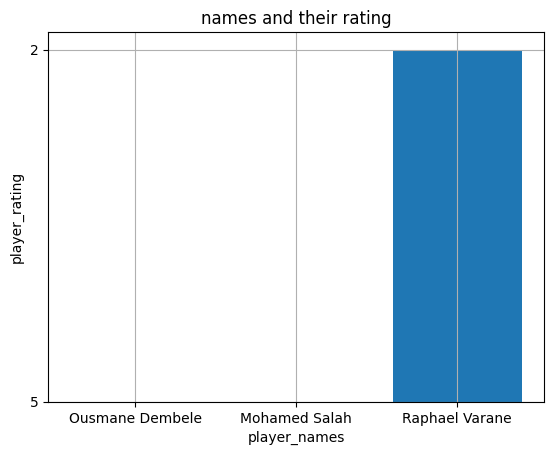

In [33]:
x = FIFA_data['name'][:10]
y = FIFA_data['Rating'][:10]
print(plt.bar(x.head(3),y.head(3)))
plt.xlabel("player_names")
plt.ylabel("player_rating")
plt.title("names and their rating")
plt.grid()
plt.show()

###         6.Find the player has the hightest values



In [34]:

print(FIFA_data[FIFA_data['value']== FIFA_data['value']]["name"].head(1))

0    Ousmane Dembele
Name: name, dtype: object



###       7.find the player name who as over all 99 and Rating as 5


In [43]:

print(FIFA_data[(FIFA_data['over_all'] == 98) & (FIFA_data['Rating'] == 5)])



Empty DataFrame
Columns: [name, value, code, over_all, PAC, Rating, Right_Striker]
Index: []



###       8.find all the player whose PAC = 99 and Rating = 4


In [55]:
FIFA_data[(FIFA_data['PAC']==99)  &  (FIFA_data['Rating']==5)]['name']

Series([], Name: name, dtype: object)

In [47]:
FIFA_data

,name,value,code,over_all,PAC,Rating,Right_Striker
0,Ousmane Dembele,,ESP 1,99,99,5,M
1,Mohamed Salah,,ENG 1,99,99,5,M
2,Raphael Varane,,ENG 1,99,96,2,H
3,Pele,3.3,ICO,99,96,5,M
4,Robert Lewandowski,,ESP 1,99,97,4,L
5,Lionel Messi,1.9,FRA 1,99,95,5,L
6,Cristiano Ronaldo,2,ENG 1,99,99,5,L
7,Julian Alvarez,,ENG 1,98,99,5,L
8,Jules Kounde,,ESP 1,98,96,3,H
9,Erling Haaland,,ENG 1,98,99,4,L
